In [3]:
%load_ext autoreload

%autoreload 2

from countrycrab import solver
import os
import matplotlib.pyplot as plt
import numpy as np
os.environ["CUDA_VISIBLE_DEVICES"]="1,2,3,4,5,6,7"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2025-05-29 17:59:21,693	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
!pip install ray[tune]

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 KB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 4.9 MB/s eta 0:00:00a 0:00:01


### Example 1: pass to the solver just the instance path

In [13]:
module_path = os.path.abspath(os.path.join(".."))
config = {'instance': module_path +'/data/datasets/3sat/uf20-91/uf20-03.cnf',          
          'heuristic': 'GNSAT',
         'compiler':'compile_GNSAT',
         'noise':0.7,
          'max_runs':100,
         'max_flips': 500}

In [14]:
%%time
p_vs_it_g, violated_constr_mat, inputs, (ts_g, p_vs_t_g) = solver.solve(config = config,params = config)

CPU times: user 6.03 s, sys: 184 ms, total: 6.21 s
Wall time: 6.21 s


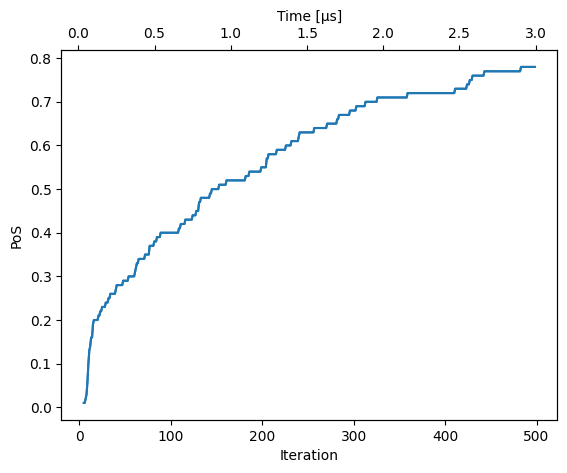

In [15]:
fig, ax = plt.subplots()
twinax = ax.twiny()

ax.plot(p_vs_it_g)
ax.set_xlabel("Iteration")
ax.set_ylabel("PoS")

twinax.plot(ts_g * 1e6, p_vs_t_g)
twinax.set_xlabel("Time [µs]");